# Algerian Forest Fires Dataset
### Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

### Attribute Information:

- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
- Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws :Wind speed in km/h: 6 to 29
- Rain: total day in mm: 0 to 16.8 FWI Components
- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- Drought Code (DC) index from the FWI system: 7 to 220.4
- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
- Buildup Index (BUI) index from the FWI system: 1.1 to 68
- Fire Weather Index (FWI) Index: 0 to 31.1
- Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [4]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset" # value 0 would be for Bejaia Region

2 : "Sidi-Bel Abbes Region Dataset" # value 0 would be for Sidi-Bel Abbes Region

Add new column with region

In [6]:
# Great way to add a new column with Complete multiple columns of dataframe
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1
data= df

In [7]:
data.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
34,05,07,2012,33,66,14,0,85.9,7.6,27.9,4.8,9.1,4.9,fire,0.0
182,29,07,2012,34,59,16,0,88.1,19.5,47.2,7.4,19.5,10.9,fire,1.0
33,04,07,2012,33,78,17,0,80.1,4.6,18.5,2.7,5.7,1.7,not fire,0.0
162,09,07,2012,36,43,15,1.9,82.3,9.4,9.9,3.2,9,3.1,fire,1.0
217,02,09,2012,28,67,19,0,75.4,2.9,16.3,2,4,0.8,not fire,1.0
138,15,06,2012,28,90,15,0,66.8,7.2,14.7,1.2,7.1,0.6,not fire,1.0
190,06,08,2012,30,54,14,3.1,70.5,11,9.1,1.3,10.5,0.8,not fire,1.0
140,17,06,2012,31,69,17,4.7,62.2,3.9,8,1.1,3.8,0.4,not fire,1.0
12,13,06,2012,27,84,21,1.2,50,6.7,17,0.5,6.7,0.2,not fire,0.0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [8]:
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [9]:
data = data.dropna().reset_index(drop=True)

In [10]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [12]:
data= data.drop(122).reset_index(drop=True) # Here have used reset_index(drop=True) because the drop parameter avoid the old index being added as a column:

In [13]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [14]:
df.columns# here we have vain spaces in column names

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
# to fix spaces in columns names
data.columns = data.columns.str.strip() # this removes blank spaces from word's 
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Cheacking columns type

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [17]:
data[['Region','day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = data[['Region','day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype('int64')

In [18]:
data[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = data[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float64')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [20]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [21]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [22]:
# now I will make a copy of my data cleaned data
data.to_csv('Algerian_forest_fires_cleaned_data.csv')

## EDA

In [23]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [24]:
# day,month and year features are not that much important so droping these features
data=data.drop(['day','month','year'],axis=1)

In [25]:
data['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

the major categories are only 2 but because of some errors like - blank space this is showing this much categories

In [26]:
# encoding Classes feature
data['Classes'] = np.where(data['Classes'].str.contains('not fire'), # this is condition
                         0,# if not fire my value will be 0
                         1 # if fire my value will be 1
                         )

In [27]:
data['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [28]:
print(plt.style.available) == 'ggplot'

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


False

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>],
       [<AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>,
        <AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>]], dtype=object)

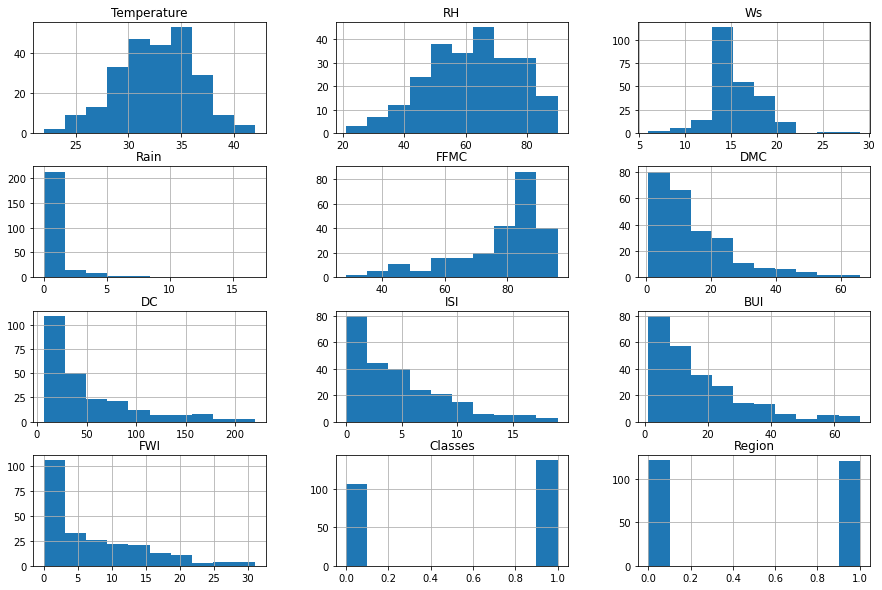

In [29]:
import matplotlib.pyplot as plt
import numpy as np


data.hist(figsize=(15,10))

<AxesSubplot:>

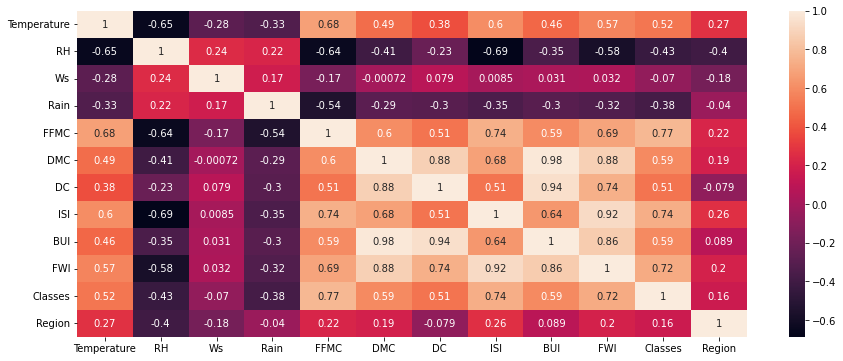

In [30]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)

In [31]:
# percentage for pie chart
percentage = data['Classes'].value_counts(normalize=True # this shows proportion of data
                                        ) *100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

Text(0.5, 1.0, 'Classes pie chart')

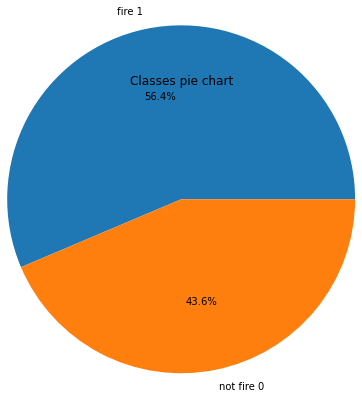

In [32]:
plt.pie(percentage,labels=['fire 1','not fire 0'],autopct='%1.1f%%',radius=2)
plt.title('Classes pie chart')

In [33]:
dfs = pd.read_csv('Algerian_forest_fires_cleaned_data.csv')
dfs.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

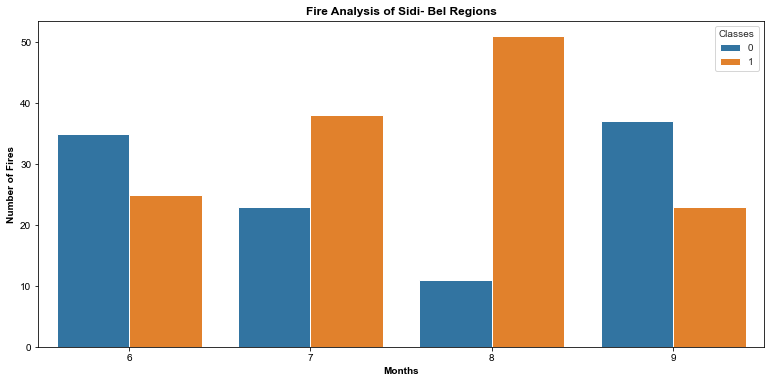

In [34]:
## Monthly Fire Analysis
dftemp=dfs.loc[dfs['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x=dfs['month'],hue='Classes',data=data)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

# 0 = not fire , 1 = fire

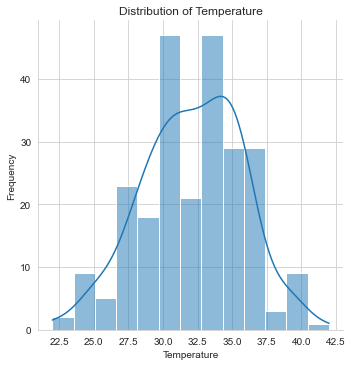

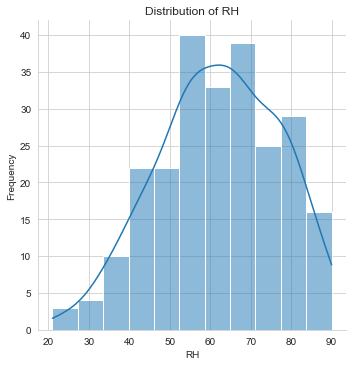

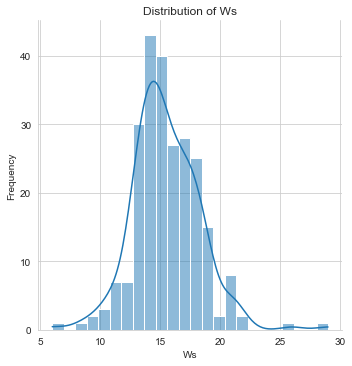

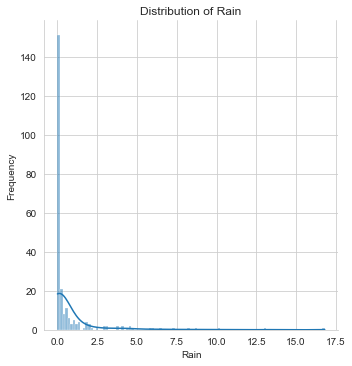

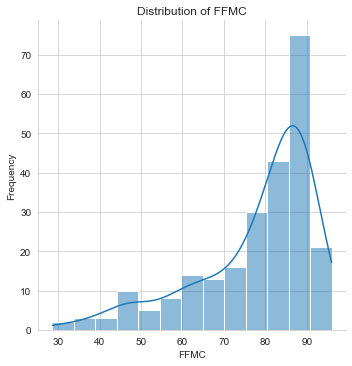

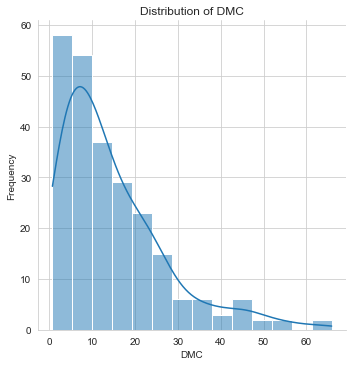

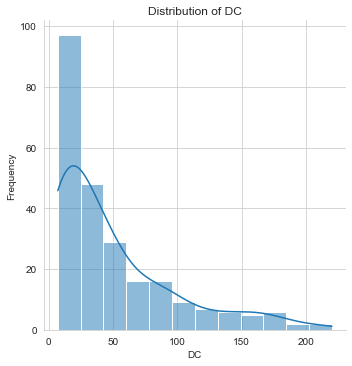

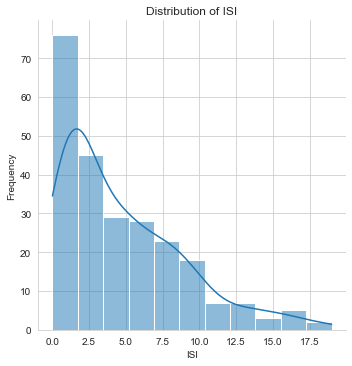

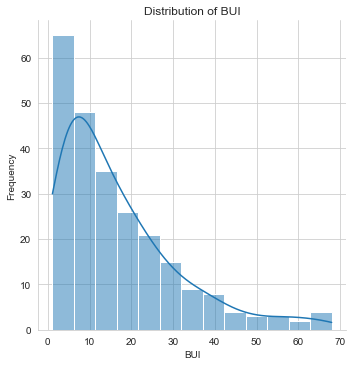

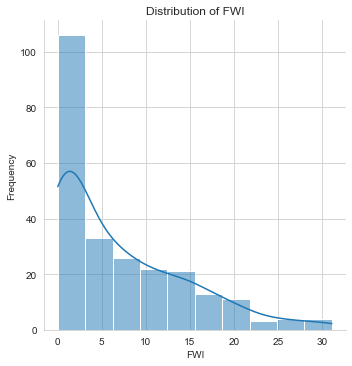

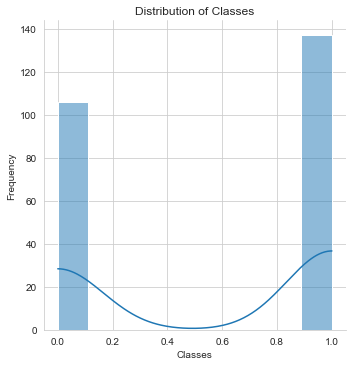

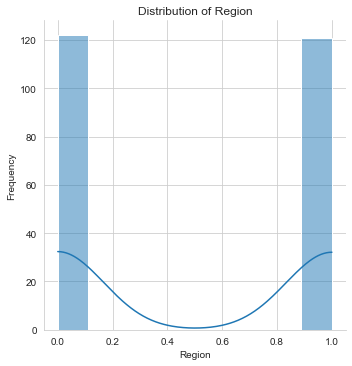

In [35]:
for column in data.columns:
    sns.displot(data, x=column, kde=True,row_order=(3,4))
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Training model with cleand dataset

### Import Necessary Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split # for train_test_split
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.linear_model import LinearRegression # for Linear Regression Model
from sklearn.metrics import mean_squared_error,mean_absolute_error # for finding errors
from sklearn.metrics import r2_score # for Checking Accuracy 
from sklearn.linear_model import Lasso # for Lasso Regression Model
from sklearn.linear_model import Ridge # for Ridge Regression Model
from sklearn.neighbors import KNeighborsRegressor # for KNN model
from sklearn.tree import DecisionTreeRegressor # For decision Tree Regressor Model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from sklearn.svm import SVR
from xgboost import XGBRegressor
import pickle # for pickling

In [37]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


## Fire Weather Index (FWI) Index: 0 to 31.1 is target variable

In [38]:
# dividing intodependent and independent features
X = data.drop('FWI',axis=1)
y = data['FWI']


In [39]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [40]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((182, 11), (182,), (61, 11), (61,))

## Feature selection based on  Corrrelation

In [41]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


Text(0.5, 1.0, 'correlation for feature selection')

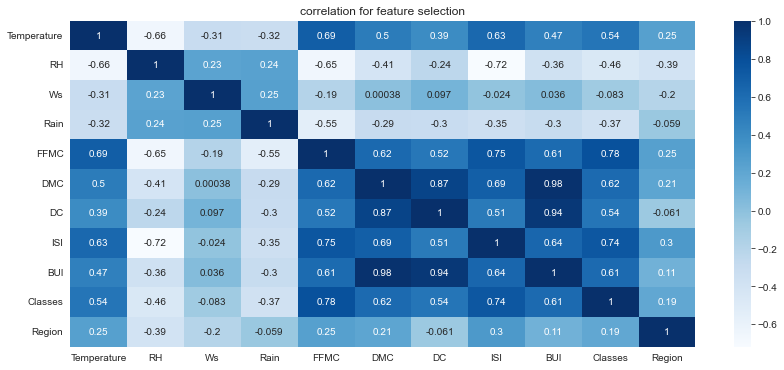

In [42]:
plt.figure(figsize=(14,6))
sns.heatmap(X_train.corr(),annot=True,cmap='Blues')
plt.title('correlation for feature selection')

Text(0.5, 1.0, 'correlation for feature selection')

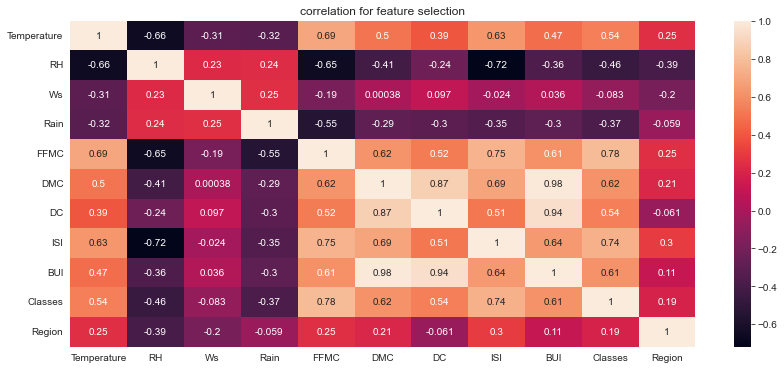

In [43]:
plt.figure(figsize=(14,6))
sns.heatmap(X_train.corr(),annot=True)
plt.title('correlation for feature selection')

In [44]:
X_train.shape

(182, 11)

In [45]:
# function for finding correlation 

# threshold value is given by domain expertise
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [46]:
correlation(X_train,0.85) 


{'BUI', 'DC'}

I am in conclusion that BUI and DC are highly correlated

In [47]:
# removing one feature would be best good option
X_train.drop('DC',axis=1,inplace=True)
X_test.drop('DC',axis=1,inplace=True)

In [48]:
X_train.shape,X_test.shape

((182, 10), (61, 10))

## Standardization

In [49]:
scaler = StandardScaler()
scaler

StandardScaler()

In [50]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
X_train_scaled.shape

(182, 10)

In [52]:
X_test_scaled.shape

(61, 10)

In [53]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.77269802,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.90344718,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.38339978,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.03419633,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.18383528,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.99290713,
        -1.10431526, -0.98907071]])

In [54]:
# Converting numpy array imto pandas Dataframe
scaled_x_df= pd.DataFrame(X_train_scaled, columns=X_train.columns)
scaled_x_df

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,Region
0,-0.842842,0.783080,1.299720,-0.337274,-0.128056,-0.882729,-0.629633,-0.772698,-1.104315,-0.989071
1,-0.301758,0.649508,-0.598748,-0.290487,-1.217586,-0.866876,-0.930585,-0.903447,-1.104315,1.011050
2,2.133120,-2.088702,-0.219054,-0.384060,1.157031,0.615402,2.727139,0.383400,0.905539,1.011050
3,-0.031216,-0.151919,0.920027,-0.243701,-0.037262,-0.272379,-0.606483,-0.187768,-1.104315,-0.989071
4,-0.031216,-1.020132,-0.598748,-0.056555,-0.009325,-0.605297,-0.699084,-0.690120,-1.104315,-0.989071
...,...,...,...,...,...,...,...,...,...,...
177,-2.195553,1.317365,-0.219054,-0.196914,-2.286163,-1.096748,-1.069486,-1.061722,-1.104315,-0.989071
178,-1.113385,1.183793,0.540333,1.066320,-1.971876,-0.930289,-1.023186,-0.951618,-1.104315,-0.989071
179,-1.925011,0.916651,0.540333,2.984564,-2.209337,-1.065041,-1.069486,-1.034196,-1.104315,-0.989071
180,0.509868,-0.218705,0.160640,-0.384060,0.730997,0.377603,0.597325,0.183835,0.905539,1.011050


## Understanding the effect of Scaling

Text(0.5, 1.0, 'After scaling')

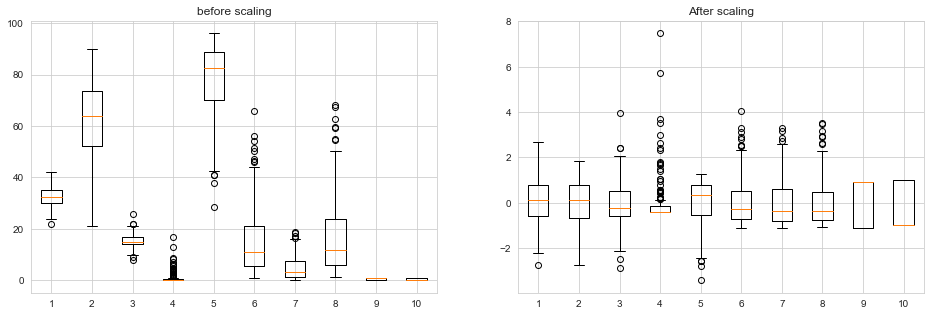

In [55]:
plt.subplots(1,2,figsize = (16,5))
plt.subplot(1,2,1)
plt.boxplot(X_train)
plt.title('before scaling')
plt.subplot(1,2,2)
plt.boxplot(scaled_x_df)
plt.title('After scaling')

D:\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'After scaling')

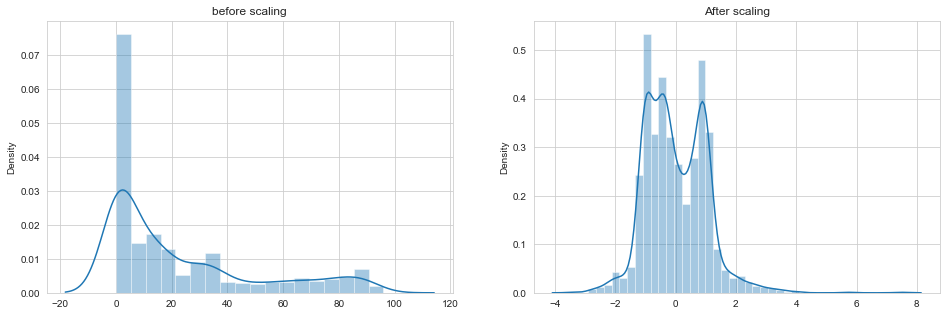

In [56]:
plt.subplots(1,2,figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(X_train)
plt.title('before scaling')
plt.subplot(1,2,2)
sns.distplot(scaled_x_df)
plt.title('After scaling')
# here my values rangs between -2 t0 2

# Model Building

## Linear Regression Model

In [57]:
# training model
linear_regresssion = LinearRegression(n_jobs=-1)
linear_regresssion.fit(X=X_train_scaled,y=y_train)
# predicting 
y_pred_test_linear = linear_regresssion.predict(X_test_scaled)
print(y_pred_test_linear.shape,y_test.shape)
y_pred_test_linear,y_test

(61,) (61,)


(array([ 8.30457914,  7.48543259, -0.07124803,  5.1239953 ,  6.58646661,
         1.34845765,  2.29146389,  7.46320932,  1.91726023,  3.1720968 ,
         0.06104952,  7.8522068 ,  9.50002921, 16.40375946, 19.06240412,
         1.26460683,  2.14282766, -0.03921186,  6.7910547 ,  3.16474665,
         1.26043867,  0.24044841,  6.44149991,  0.08436122, 20.99410994,
         4.87656305,  5.88138004,  9.95537379,  0.18798004,  9.69921185,
         6.34859082, -0.13114286, 10.28194824, 15.02613276,  1.30305119,
         0.62923538,  1.87653957,  6.12315886, -0.31545055, -0.52966099,
         7.0779492 ,  1.61961767,  8.47263835, -0.37422259, 15.24420514,
         7.90097258,  7.71318307,  1.01994088, 12.53560642,  0.85369155,
        28.74405001,  5.45760121, 17.0982405 , 20.06235185, 14.33230103,
        16.55893998,  0.68548131,  8.77001654,  3.68182833, 14.67609754,
         5.08865108]),
 24      8.4
 6       7.2
 152     0.5
 232     3.8
 238     6.5
        ... 
 162     0.8
 178     9

In [58]:
# checking errors
mse_linear = mean_squared_error(y_true=y_test,y_pred=y_pred_test_linear)
mae_linear = mean_absolute_error(y_true=y_test,y_pred=y_pred_test_linear)
rmse_linear = np.sqrt(mse_linear)
print(mse_linear)
print(mae_linear)
print(rmse_linear)

0.4992999459262424
0.4819559932260659
0.7066115948144656


In [59]:
# Checking Accuracy of model
score_r2_linear = r2_score(y_true=y_test,y_pred=y_pred_test_linear)
adjusted_score_r2_linear = 1-(1-score_r2_linear)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_linear',score_r2_linear) 
print('adjusted_score_r2_linear',adjusted_score_r2_linear)

score_r2_linear 0.9887190731606889
adjusted_score_r2_linear 0.9864628877928266


## Lasso Linear Regression model

In [60]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred_test_lasso = lasso.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test,y_pred_test_lasso)
mse_lasso = mean_squared_error(y_test,y_pred_test_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print('mse_lasso ',mse_lasso)
print('mae_lasso ',mae_lasso)
print('rmse_lasso',rmse_lasso)
# Checking Accuracy of model
score_r2_lasso = r2_score(y_true=y_test,y_pred=y_pred_test_lasso)
adjusted_score_r2_lasso = 1-(1-score_r2_lasso)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_lasso ',score_r2_lasso)
print('adjusted_score_r2_lasso ',adjusted_score_r2_lasso)

mse_lasso  2.0000529467649155
mae_lasso  1.081630596592489
rmse_lasso 1.4142322817574613
score_r2_lasso  0.9548118297402408
adjusted_score_r2_lasso  0.945774195688289


## Ridge Linear Regression model

In [61]:
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_test_ridge = ridge.predict(X_test_scaled)
# checking errors
mae_ridge = mean_absolute_error(y_test,y_pred_test_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_test_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print('mse_ridge ',mse_ridge)
print('mae_ridge ',mae_ridge)
print('rmse_ridge',rmse_ridge)
 # Checking Accuracy of model
score_r2_ridge = r2_score(y_true=y_test,y_pred=y_pred_test_ridge)
adjusted_score_r2_ridge = 1-(1-score_r2_ridge)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_ridge ',score_r2_ridge)  
print('adjusted_score_r2_ridge ',adjusted_score_r2_ridge)

mse_ridge  0.5281948451212556
mae_ridge  0.49770729505590666
rmse_ridge 0.7267701460030231
score_r2_ridge  0.9880662366312486
adjusted_score_r2_ridge  0.9856794839574983


## KNN

In [62]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
y_pred_test_knn = knn.predict(X_test_scaled)
# checking errors
mae_knn = mean_absolute_error(y_test,y_pred_test_knn)
mse_knn = mean_squared_error(y_test,y_pred_test_knn)
rmse_knn = np.sqrt(mse_knn)
print('mse_KNN ',mse_knn)
print('mae_KNN ',mae_knn)
print('rmse_KNN',rmse_knn)
score_r2_knn = r2_score(y_true=y_test,y_pred=y_pred_test_knn)
adjusted_score_r2_knn = 1-(1-score_r2_knn)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_knn ',score_r2_knn)  
print('adjusted_score_r2_knn ',adjusted_score_r2_knn)

mse_KNN  2.2207832422586518
mae_KNN  0.9928961748633879
rmse_KNN 1.490229258288352
score_r2_knn  0.9498247626776455
adjusted_score_r2_knn  0.9397897152131746


## Decision Tree

In [63]:
step1 = DecisionTreeRegressor(max_depth=8)
step1.fit(X_train_scaled,y_train)
y_pred_test_step1 = step1.predict(X_test_scaled)
# checking errors
mae_step1 = mean_absolute_error(y_test,y_pred_test_step1)
mse_step1 = mean_squared_error(y_test,y_pred_test_step1)
rmse_step1 = np.sqrt(mse_step1)
print('mse_DecisionTree ',mse_step1)
print('mae_DecisionTree ',mae_step1)
print('rmse_DecisionTree',rmse_step1)
score_r2_step1 = r2_score(y_true=y_test,y_pred=y_pred_test_step1)
adjusted_score_r2_step1 = 1-(1-score_r2_step1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_DecisionTree ',score_r2_step1)  
print('adjusted_score_r2_DecisionTree ',adjusted_score_r2_step1)

mse_DecisionTree  2.6564205849689597
mae_DecisionTree  0.9682181889149104
rmse_DecisionTree 1.629852933540005
score_r2_DecisionTree  0.9399821960367253
adjusted_score_r2_DecisionTree  0.9279786352440703


## SVR

In [64]:
step1 = SVR(kernel='rbf',C=10000,epsilon=0.1)
step1.fit(X_train_scaled,y_train)
y_pred_test_step1 = step1.predict(X_test_scaled)
# checking errors
mae_step1 = mean_absolute_error(y_test,y_pred_test_step1)
mse_step1 = mean_squared_error(y_test,y_pred_test_step1)
rmse_step1 = np.sqrt(mse_step1)
print('mse_SVR ',mse_step1)
print('mae_SVR ',mae_step1)
print('rmse_SVR',rmse_step1)
score_r2_step1 = r2_score(y_true=y_test,y_pred=y_pred_test_step1)
adjusted_score_r2_step1 = 1-(1-score_r2_step1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_SVR ',score_r2_step1)  
print('adjusted_score_r2_SVR ',adjusted_score_r2_step1)

mse_SVR  0.9358399460545143
mae_SVR  0.45338818085298177
rmse_SVR 0.9673882085566861
score_r2_SVR  0.978856112341127
adjusted_score_r2_SVR  0.9746273348093524


## Random Forest

In [65]:
step1 = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.75,
                             max_features=0.75,
                             max_depth=15)
step1.fit(X_train_scaled,y_train)
y_pred_test_step1 = step1.predict(X_test_scaled)
# checking errors
mae_step1 = mean_absolute_error(y_test,y_pred_test_step1)
mse_step1 = mean_squared_error(y_test,y_pred_test_step1)
rmse_step1 = np.sqrt(mse_step1)
print('mse_RandomForest ',mse_step1)
print('mae_RandomForest ',mae_step1)
print('rmse_RandomForest',rmse_step1)
score_r2_step1 = r2_score(y_true=y_test,y_pred=y_pred_test_step1)
adjusted_score_r2_step1 = 1-(1-score_r2_step1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_RandomForest ',score_r2_step1)  
print('adjusted_score_r2_RandomForest ',adjusted_score_r2_step1)

mse_RandomForest  0.8477425081967204
mae_RandomForest  0.636147540983606
rmse_RandomForest 0.9207293349278713
score_r2_RandomForest  0.9808465406584401
adjusted_score_r2_RandomForest  0.9770158487901281


## ExtraTree Regressor

In [66]:
step1 = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15,
                           bootstrap=True)
step1.fit(X_train_scaled,y_train)
y_pred_test_step1 = step1.predict(X_test_scaled)
# checking errors
mae_step1 = mean_absolute_error(y_test,y_pred_test_step1)
mse_step1 = mean_squared_error(y_test,y_pred_test_step1)
rmse_step1 = np.sqrt(mse_step1)
print('mse_ExtraTrees ',mse_step1)
print('mae_ExtraTrees ',mae_step1)
print('rmse_ExtraTrees',rmse_step1)
score_r2_step1 = r2_score(y_true=y_test,y_pred=y_pred_test_step1)
adjusted_score_r2_step1 = 1-(1-score_r2_step1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_ExtraTrees ',score_r2_step1)  
print('adjusted_score_r2_ExtraTrees ',adjusted_score_r2_step1)

mse_ExtraTrees  0.5908163770491806
mae_ExtraTrees  0.5099508196721314
rmse_ExtraTrees 0.7686458072800375
score_r2_ExtraTrees  0.9866513978634734
adjusted_score_r2_ExtraTrees  0.9839816774361682


## AdaBoost Regressor

In [67]:
step1 = AdaBoostRegressor(n_estimators=100,learning_rate=1.0)
step1.fit(X_train_scaled,y_train)
y_pred_test_step1 = step1.predict(X_test_scaled)
# checking errors
mae_step1 = mean_absolute_error(y_test,y_pred_test_step1)
mse_step1 = mean_squared_error(y_test,y_pred_test_step1)
rmse_step1 = np.sqrt(mse_step1)
print('mse_AdaBoost ',mse_step1)
print('mae_AdaBoost ',mae_step1)
print('rmse_AdaBoost',rmse_step1)
score_r2_step1 = r2_score(y_true=y_test,y_pred=y_pred_test_step1)
adjusted_score_r2_step1 = 1-(1-score_r2_step1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_AdaBoost ',score_r2_step1)  
print('adjusted_score_r2_AdaBoost ',adjusted_score_r2_step1)

mse_AdaBoost  2.074731712231189
mae_AdaBoost  1.2431529835812207
rmse_AdaBoost 1.4403929020344377
score_r2_AdaBoost  0.9531245760232144
adjusted_score_r2_AdaBoost  0.9437494912278573


## Gradient Boosting Regressor

In [68]:
step1 = GradientBoostingRegressor(n_estimators=500)
step1.fit(X_train_scaled,y_train)
y_pred_test_step1 = step1.predict(X_test_scaled)
# checking errors
mae_step1 = mean_absolute_error(y_test,y_pred_test_step1)
mse_step1 = mean_squared_error(y_test,y_pred_test_step1)
rmse_step1 = np.sqrt(mse_step1)
print('mse_GradientBoosting ',mse_step1)
print('mae_GradientBoosting ',mae_step1)
print('rmse_GradientBoosting',rmse_step1)
score_r2_step1 = r2_score(y_true=y_test,y_pred=y_pred_test_step1)
adjusted_score_r2_step1 = 1-(1-score_r2_step1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_GradientBoosting ',score_r2_step1)  
print('adjusted_score_r2_GradientBoosting ',adjusted_score_r2_step1)

mse_GradientBoosting  0.9759052177929866
mae_GradientBoosting  0.6387265307207771
rmse_GradientBoosting 0.9878791514112374
score_r2_GradientBoosting  0.9779508981447979
adjusted_score_r2_GradientBoosting  0.9735410777737574


## XGBRegressor

In [69]:
step1 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
step1.fit(X_train_scaled,y_train)
y_pred_test_step1 = step1.predict(X_test_scaled)
# checking errors
mae_step1 = mean_absolute_error(y_test,y_pred_test_step1)
mse_step1 = mean_squared_error(y_test,y_pred_test_step1)
rmse_step1 = np.sqrt(mse_step1)
print('mse_XGB ',mse_step1)
print('mae_XGB ',mae_step1)
print('rmse_XGB',rmse_step1)
score_r2_step1 = r2_score(y_true=y_test,y_pred=y_pred_test_step1)
adjusted_score_r2_step1 = 1-(1-score_r2_step1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_XGB ',score_r2_step1)  
print('adjusted_score_r2_XGB ',adjusted_score_r2_step1)

mse_XGB  1.1823175090261504
mae_XGB  0.7384440441188387
rmse_XGB 1.0873442458697937
score_r2_XGB  0.9732873247253849
adjusted_score_r2_XGB  0.9679447896704619


The best performing model is **Gradient Boosting Regressor** with an RMSE of 0.98, R2Score of 0.97 and Adjusted R2 Score of 0.97. However, the **Linear Regressor** and **Ridge Linear Regressor models** also perform well with an RMSE of 0.70 and 0.72 respectively. The Lasso Linear Regressor model performs the worst with an RMSE of 1.41.